Import Libraries

In [2]:
import pandas as pd
import seaborn as sns
import os

Read all pred csv files

In [17]:
dfs = []
for i in os.listdir():
    df = pd.read_csv(i)
    df["file"] = [i.split("_")[1]] * len(df)
    df["replicate"] = [(i.split("_")[-3]).split("replicate")[1]] * len(df)
    df["run"] = [(i.split("_")[-2]).split("run")[1]] * len(df)
    dfs.append(df)


Combine all the above files

In [28]:
for i in range(len(dfs)):
    dfs[i] = dfs[i].drop(["replicate", "run"], axis=1)

In [41]:
combined_df = pd.concat(dfs)
combined_df

,transcript_id,transcript_position,score,file
0,ENST00000000233,244,0.029629,A549
1,ENST00000000233,261,0.015825,A549
2,ENST00000000233,316,0.235871,A549
3,ENST00000000233,332,0.417208,A549
4,ENST00000000233,368,0.170426,A549
...,...,...,...,...
1446017,R2_7_2,1174,0.573344,MCF7
1446018,R2_7_2,1537,0.004108,MCF7
1446019,R2_7_2,1543,0.000092,MCF7
1446020,R2_7_2,1604,0.003175,MCF7


Plot Graph

[Text(0.5, 1.0, 'Position of m6a modification'), Text(0, 0.5, 'Cell Line')]

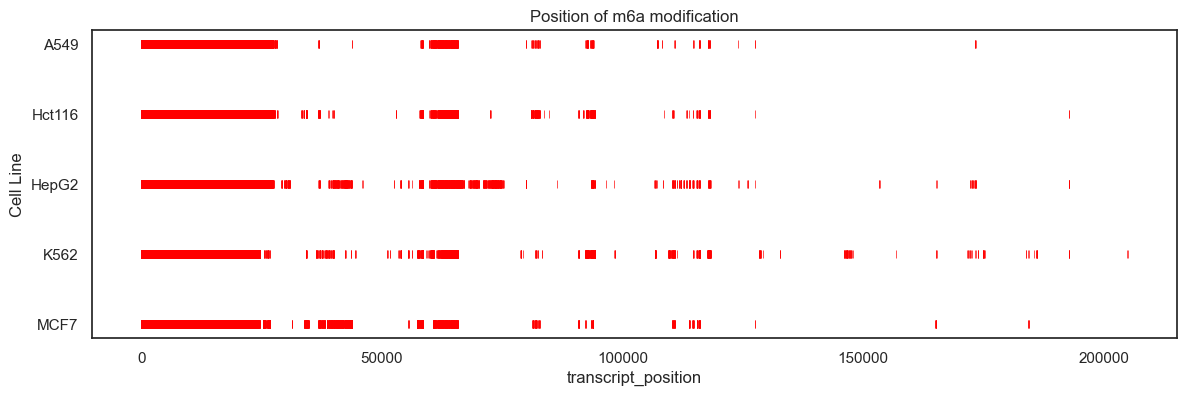

In [47]:
sns.set(rc={'figure.figsize':(14,4)})
sns.set(style="white")
sns.scatterplot(data=combined_df, x='transcript_position', y='file', marker='|', color='red').set(title="Position of m6a modification", ylabel="Cell Line")

In [19]:
df = pd.read_csv("combined_scores.csv")

In [20]:
df

,Unnamed: 0,transcript_id,transcript_position,score1,score2,score3,score4,label
0,1,ENST00000000233,244,0,0,0,0,0
1,2,ENST00000000233,261,0,0,0,0,0
2,3,ENST00000000233,316,0,0,0,0,0
3,4,ENST00000000233,332,0,0,1,0,0
4,5,ENST00000000233,368,0,0,0,0,0
...,...,...,...,...,...,...,...,...
114312,114313,ENST00000641834,610,1,0,0,1,1
114313,114314,ENST00000641834,697,0,0,0,0,0
114314,114315,ENST00000641834,864,1,1,1,1,1
114315,114316,ENST00000641834,926,1,1,1,1,1


In [25]:
df[(df["score1"] != df["label"]) | (df["score2"] != df["label"]) | (df["score3"] != df["label"]) | (df["score4"] != df["label"])]

,Unnamed: 0,transcript_id,transcript_position,score1,score2,score3,score4,label
3,4,ENST00000000233,332,0,0,1,0,0
8,9,ENST00000000233,471,1,1,1,1,0
9,10,ENST00000000233,539,1,0,0,0,0
12,13,ENST00000000233,665,1,1,1,1,0
16,17,ENST00000000233,765,1,1,1,1,0
...,...,...,...,...,...,...,...,...
114307,114308,ENST00000641834,377,0,0,1,0,0
114309,114310,ENST00000641834,431,0,0,0,1,0
114311,114312,ENST00000641834,575,1,0,1,1,1
114312,114313,ENST00000641834,610,1,0,0,1,1


In [26]:
24181/114317 * 100

21.152584479998602

In [ ]:
# Check score3 vs all other label wrong predictions (freq)